# Домашнее задание к лекции «Дискриминантный и факторный анализ»

**Задание**

- Возьмите датасет с цветками iris'а (sklearn.datasets.load_iris);
- Оставьте два признака sepal_length и sepal_width и целевую переменную - variety;
- Разделите данные на выборку для обучения и тестирования;
- Построить модель LDA;
- Визуализируйте предсказания для тестовой выборки и центры классов; (разделяющую плоскость можно не строить, но обратите внимание, что класса 3);
- Отбросьте целевую переменную и оставьте только два признака sepal_length и sepal_width;
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

data = data[["sepal length (cm)", "sepal width (cm)"]]
data.columns = ["sepal_length", "sepal_width"]

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, iris.target, test_size=0.25)

In [5]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
lda = LinearDiscriminantAnalysis()

In [7]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [8]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2])

In [9]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,2
1,1,2
2,0,0
3,0,0
4,1,1
5,0,0
6,2,2
7,1,1
8,1,2
9,0,0


In [10]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

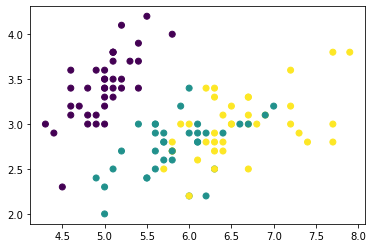

In [11]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [12]:
from sklearn.cluster import KMeans

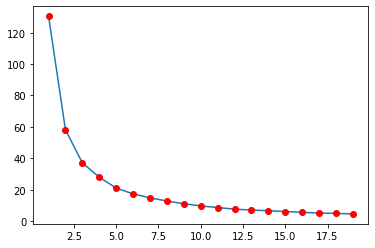

In [13]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [14]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_test)
clusters

array([1, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1])

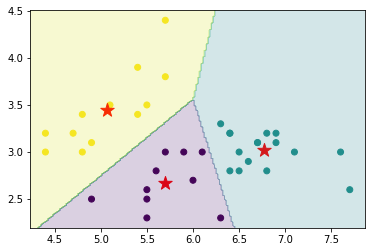

In [18]:
plt.scatter(X_test.sepal_length, X_test.sepal_width, c=clusters)

# Отображаем центры классов.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', s=200, marker='*')

X = np.vstack((X_train, X_test))

# Отображаем области решения.
nx, ny = 200, 200
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nx),
                       np.linspace(x2_min, x2_max, ny))

Z = kmeans.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.2)